In [1]:
!pip install netCDF4
!pip install Geopandas

     |████████████████████████████████| 4.1MB 2.7MB/s 
     |████████████████████████████████| 327kB 30.8MB/s 
     |████████████████████████████████| 931kB 2.6MB/s 
     |████████████████████████████████| 14.7MB 207kB/s 
     |████████████████████████████████| 10.9MB 39.1MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
'A gentle guide to deep learning object detection - PyImageSearch'
 backup
 Classroom
'Colab Notebooks'
'Google Earth'
'ML challenge'
 SC209


In [0]:
#Data is in Google Drive

# import urllib
# urllib.request.urlretrieve('http://api.gbif.org/v1/occurrence/download/request/0056251-200221144449610.zip', 'bar_headed_goose.zip')

# #Data Citation : GBIF.org (5 May 2020) GBIF Occurrence Download https://doi.org/10.15468/dl.sq7x8w

# from zipfile import ZipFile
# file = 'bar_headed_goose.zip'

# with ZipFile(file,'r') as zip:
#   zip.extractall()
#   print('Done')


#Importing Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from netCDF4 import Dataset
import matplotlib.pyplot as plt


In [0]:
#Importing Bird Dataset

dataset = pd.read_csv('/mydrive/SC209/0056251-200221144449610.csv',sep = '\t',dtype =np.unicode)

# 21 = decimalLatitude
# 22 = decimalLongitude
# 30 = day
# 31 = month
# 32 = year
bird_data = dataset.iloc[:,[21,22,30,31,32]].values

In [0]:
import math
dataarray = np.array(bird_data.astype('float'))

bird_pos = {}
bird_coord = {}
cnt = 0
for bird in dataarray:
  if 0<bird[0]<60 and 50<bird[1]<140:
    try:
      pos = str(round(bird[1],0))+','+str(round(bird[0],0))+','+str(int(bird[3]))
      if pos in bird_pos:
        bird_pos[pos]+=1
      else:
        bird_pos[pos]=1

      coord = str(round(bird[1],0))+','+str(round(bird[0],0))
      if ~(coord in bird_coord):
        bird_coord[coord]=True

      cnt+=1
    except:
      pass
      

In [0]:
print(len(bird_pos))
print(len(bird_coord))

1024
351


In [0]:
# !unzip /mydrive/SC209/NewData.zip -d /mydrive/SC209

In [0]:
# #Initialization of weather data

# weather_data = []

# for i in range(2000,2019):
#   year_wise = []
#   for j in range(1,13):
#     month_wise = []
#     if j<10:
#       mon = '0'+str(j)
#     else:
#       mon = str(j)

#     ds = Dataset('/mydrive/SC209/NewData/GLDAS_NOAH025_M.A'+str(i)+mon+'.021.nc4.SUB.nc4')
#     # weather_data.append(ds)
#     lats = ds.variables['lat'][:]
#     lons = ds.variables['lon'][:]
#     time = ds.variables['time'][:]
#     STavg = ds.variables['AvgSurfT_inst'][:]
#     Precavg = ds.variables['Rainf_f_tavg'][:]
#     ATavg = ds.variables['Tair_f_inst'][:]
#     Windavg = ds.variables['Wind_f_inst'][:]
#     Humavg = ds.variables['Qair_f_inst'][:]
#     Presavg = ds.variables['Psurf_f_inst'][:]

#     for lat_i in range(len(lats)):
#       for lon_i in range(len(lons)):
#         if 0<lats[lat_i]<60 and 50<lons[lon_i]<140 and STavg.mask[0][lat_i][lon_i]==False and Precavg.mask[0][lat_i][lon_i]==False and ATavg.mask[0][lat_i][lon_i]==False and Windavg.mask[0][lat_i][lon_i]==False and Presavg.mask[0][lat_i][lon_i]==False and Humavg.mask[0][lat_i][lon_i]==False:
#             month_wise.append([lats[lat_i],lons[lon_i],int(j),int(i),STavg[0][lat_i][lon_i],Precavg[0][lat_i][lon_i],ATavg[0][lat_i][lon_i],Windavg[0][lat_i][lon_i],Presavg[0][lat_i][lon_i],Humavg[0][lat_i][lon_i]])
    
#     year_wise.append(month_wise)

#   weather_data.append(year_wise)


In [0]:
# np.save('/mydrive/SC209/env_data.npy', weather_data)

In [0]:
env_data = np.load('/mydrive/SC209/env_data.npy')
# len(env_data)
# # env_data

In [0]:
# X = []
# Y = []

# for data_year in env_data[:18]:
#   for data_month in data_year:
#     for data in data_month:
#       coord = str(round(data[1],0))+','+str(round(data[0],0))
#       if coord in bird_coord:
#         X.append(np.array(data)[[0,1,4,5,6,7,8,9]])
#         pos = coord+','+str(int(data[2]))
#         if pos in bird_pos:
#           if 0<bird_pos[pos]<50:
#             Y.append(1)
#           elif 50<=bird_pos[pos]<100:
#             Y.append(2)
#           else:
#             Y.append(3)       
#         else:
#           Y.append(0)
#         # print('True')

# print(len(X))
# print('%')
# print(len(Y))

In [0]:
# np.savetxt('/mydrive/SC209/X.csv', X, delimiter=",")
# np.savetxt('/mydrive/SC209/Y.csv', Y, delimiter=",")

In [0]:
X__ = pd.read_csv('/mydrive/SC209/X.csv').iloc[:,:].values
Y__ = pd.read_csv('/mydrive/SC209/Y.csv').iloc[:,:].values

(array([879228.,      0.,      0., 274103.,      0.,      0.,   4356.,
             0.,      0.,   7200.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

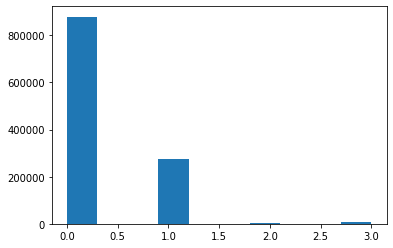

In [0]:
plt.hist(Y__)

In [0]:
# from imblearn.under_sampling import RandomUnderSampler
# undersample = RandomUnderSampler(sampling_strategy='majority')
# X, Y = undersample.fit_resample(X__, Y__)

from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline


# over_nn = SMOTEENN()
# over = SMOTE({1:10000,2:10000,3:10000})
under = RandomUnderSampler({0:200000,1:200000})
X_1, y_1 = under.fit_resample(X__, Y__)

over = SMOTE({2:80000,3:100000})
X,y = over.fit_resample(X_1,y_1)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# transform the dataset



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(array([200000.,      0.,      0., 200000.,      0.,      0.,  80000.,
             0.,      0., 100000.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

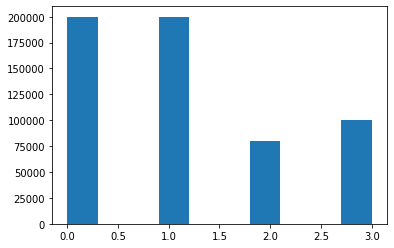

In [0]:
plt.hist(y)

In [0]:
Y=[]

for i in range(len(y)):
  if y[i]==0:
    Y.append([1,0,0,0])
  elif y[i]==1:
    Y.append([0,1,0,0])
  elif y[i]==2:
    Y.append([0,0,1,0])
  else:
    Y.append([0,0,0,1])

Y = np.array(Y)

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.1,random_state=12,shuffle=True)

# X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size= 0.2,shuffle=True)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)

In [0]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras import optimizers

In [0]:
model = Sequential([Dense(units=16,activation='relu',input_dim = 8),
                    Dense(units=16,activation='relu'),
                    # Dropout(0.2),
                    Dense(units=16,activation='relu'),
                    # Dropout(0.3),
                    Dense(units=16,activation='relu'),
                    # Dropout(0.2),
                    # Dense(units=16,activation='relu'),
                    Dense(units=4,activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_29 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_30 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 68        
Total params: 1,028
Trainable params: 1,028
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint = ModelCheckpoint('model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=31,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=10,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]


opt=optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss ='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model_detail = model.fit(X_train,Y_train,
                         batch_size=64,
                         epochs=100,
                         callbacks = callbacks,
                         validation_split=0.2,
                         shuffle = True)

In [0]:
!cp model.h5 /mydrive/SC209

In [0]:
from tensorflow.keras.models import load_model
model = load_model('/mydrive/SC209/model.h5')

In [0]:
Y_test = [ np.argmax(i) for i in Y_test]

(array([19966.,     0.,     0., 20061.,     0.,     0.,  8036.,     0.,
            0.,  9937.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

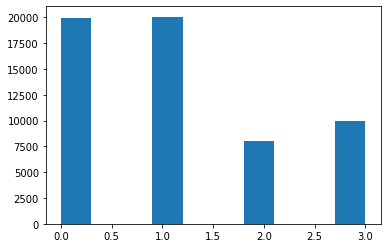

In [0]:
plt.hist(Y_test)

In [0]:
X_test=sc_X.transform(X_test)
y_pred = model.predict(X_test)

In [0]:
Y_pred = [ np.argmax(i) for i in y_pred]

(array([17040.,     0.,     0., 22367.,     0.,     0.,  8434.,     0.,
            0., 10159.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

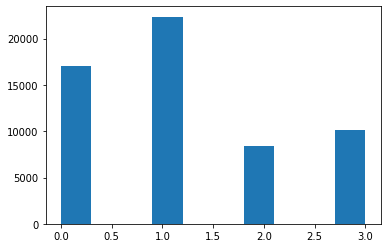

In [0]:
plt.hist(Y_pred)

In [0]:
#Testing for 2018 data


X_test_ = []
Y_test_ = []

#Month
month = 12


data_year = env_data[18]  
data_month = data_year[month-1]
for data in data_month:
  # if 99.4<data[1]<101 and 36.25<=data[0]<=37.4:
    coord = str(round(data[1],0))+','+str(round(data[0],0))
    # if coord in bird_coord:
    X_test_.append(np.array(data)[[0,1,4,5,6,7,8,9]])
    pos = coord+','+str(int(data[2]))
    if pos in bird_pos:
      if 0<bird_pos[pos]<50:
        Y_test_.append(1)
      elif 50<=bird_pos[pos]<100:
        Y_test_.append(2)
      elif bird_pos[pos]>=100:
        Y_test_.append(3)          
    else:
      Y_test_.append(0)

print(len(X_test_))
print('%')
print(len(Y_test_))

52526
%
52526


In [0]:
X_test_ = np.array(X_test_)
x__ = sc_X.transform(X_test_)

In [0]:
y_pred_ = model.predict(x__)
Y_pred_ = [ np.argmax(i) for i in y_pred_]

Text(57.875, 0.5, 'Latitude')

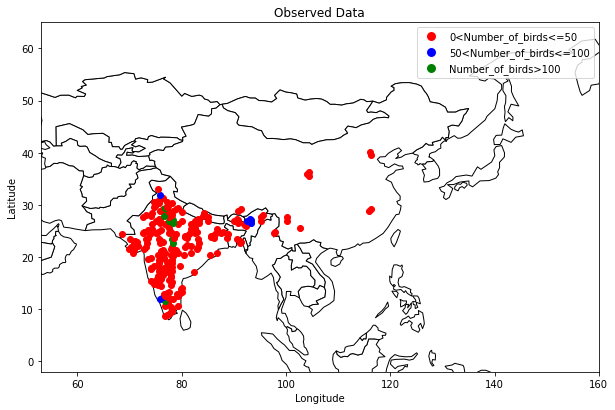

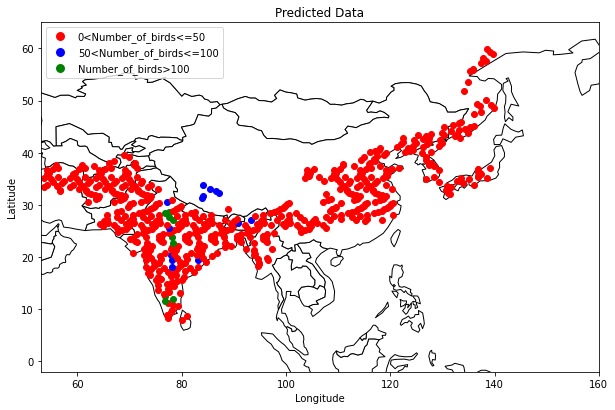

In [0]:
from matplotlib.lines import Line2D
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='b', markersize=10),
                   Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='g', markersize=10)]

ax = world.plot(figsize=(10, 10),color='white', edgecolor='black')

for i in np.arange(0,len(Y_test_)+1,10):
  if Y_test_[i]==1:
    ax.scatter(X_test_[i][1],X_test_[i][0],c='red')
  elif Y_test_[i]==2:
    ax.scatter(X_test_[i][1],X_test_[i][0],c='blue')
  elif Y_test_[i]==3:
    ax.scatter(X_test_[i][1],X_test_[i][0],c='green')

plt.xlim(53,160)
plt.ylim(-2,65)
plt.legend(legend_elements,['0<Number_of_birds<=50','50<Number_of_birds<=100','Number_of_birds>100'])
plt.title('Observed Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax = world.plot(figsize=(10, 10),color='white', edgecolor='black')

for i in np.arange(0,len(Y_pred_)+1,20):
  if Y_pred_[i]==1:
    plt.scatter(X_test_[i][1],X_test_[i][0],c='red')
  elif Y_pred_[i]==2:
    plt.scatter(X_test_[i][1],X_test_[i][0],c='blue') 
  elif Y_pred_[i]==3:
    plt.scatter(X_test_[i][1],X_test_[i][0],c='green')  

plt.xlim(53,160)
plt.ylim(-2,65)
plt.legend(legend_elements,['0<Number_of_birds<=50','50<Number_of_birds<=100','Number_of_birds>100'])
plt.title('Predicted Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(57.875, 0.5, 'Latitude')

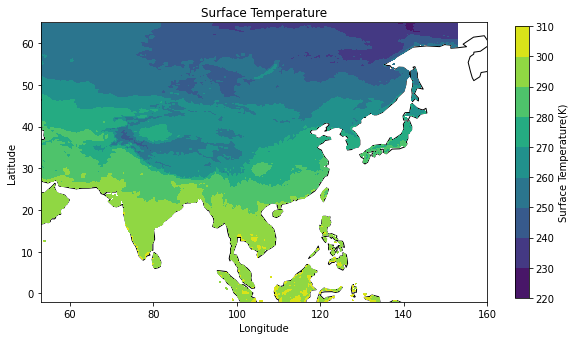

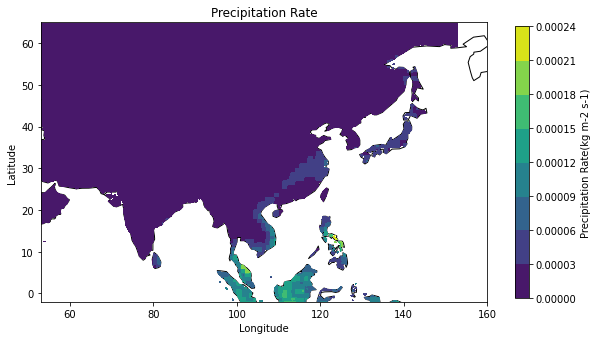

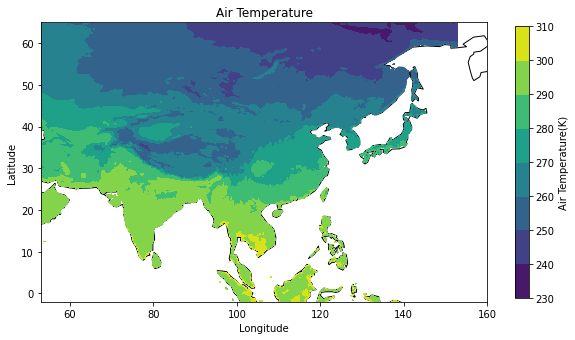

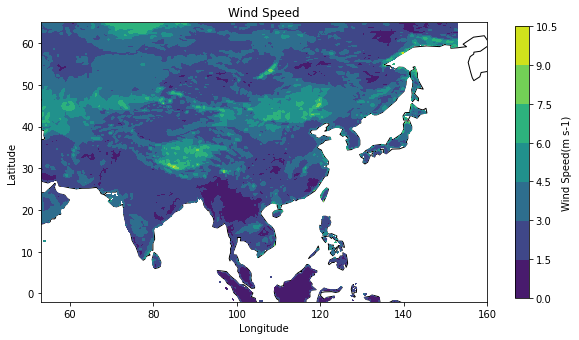

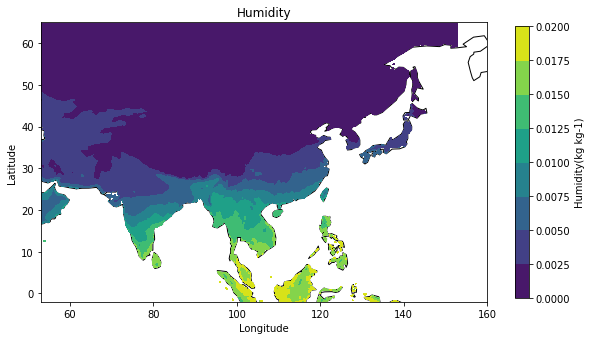

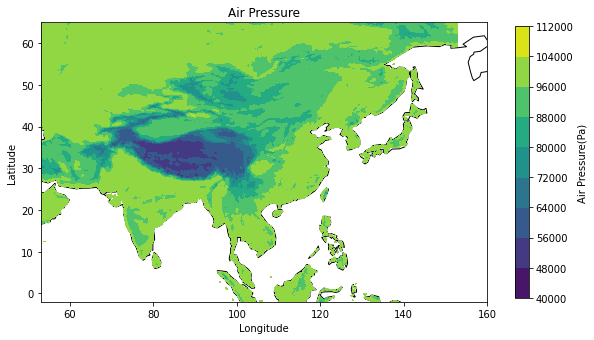

In [0]:
mon='12'
ds = Dataset('/mydrive/SC209/NewData/GLDAS_NOAH025_M.A2018'+mon+'.021.nc4.SUB.nc4')

lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
STavg = ds.variables['AvgSurfT_inst'][:]
Precavg = ds.variables['Rainf_f_tavg'][:]
ATavg = ds.variables['Tair_f_inst'][:]
Windavg = ds.variables['Wind_f_inst'][:]
Humavg = ds.variables['Qair_f_inst'][:]
Presavg = ds.variables['Psurf_f_inst'][:]

ax = world.plot(figsize=(10, 10),color='white', edgecolor='black')
plt.colorbar(ax.contourf(lons,lats,np.squeeze(STavg[0,:,:])),label='Surface Temperature(K)', shrink=0.5)
plt.xlim(53,160)
plt.ylim(-2,65)
plt.title('Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax = world.plot(figsize=(10, 10),color='white', edgecolor='black')
plt.colorbar(ax.contourf(lons,lats,np.squeeze(Precavg[0,:,:])),label='Precipitation Rate(kg m-2 s-1)',shrink=0.5)
plt.xlim(53,160)
plt.ylim(-2,65)
plt.title('Precipitation Rate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax = world.plot(figsize=(10, 10),color='white', edgecolor='black')
plt.colorbar(ax.contourf(lons,lats,np.squeeze(ATavg[0,:,:])),label='Air Temperature(K)',shrink=0.5)
plt.xlim(53,160)
plt.ylim(-2,65)
plt.title('Air Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax = world.plot(figsize=(10, 10),color='white', edgecolor='black')
plt.colorbar(ax.contourf(lons,lats,np.squeeze(Windavg[0,:,:])),label='Wind Speed(m s-1)',shrink=0.5)
plt.xlim(53,160)
plt.ylim(-2,65)
plt.title('Wind Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax = world.plot(figsize=(10, 10),color='white', edgecolor='black')
plt.colorbar(ax.contourf(lons,lats,np.squeeze(Humavg[0,:,:])),label='Humidity(kg kg-1)',shrink=0.5)
plt.xlim(53,160)
plt.ylim(-2,65)
plt.title('Humidity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax = world.plot(figsize=(10, 10),color='white', edgecolor='black')
plt.colorbar(ax.contourf(lons,lats,np.squeeze(Presavg[0,:,:])),label='Air Pressure(Pa)',shrink=0.5)
plt.xlim(53,160)
plt.ylim(-2,65)
plt.title('Air Pressure')
plt.xlabel('Longitude')
plt.ylabel('Latitude')